## 2015 Chicago Crimes 

### Author: Jose Ramos

For my final project, I explored the dataset that contained all the **crimes that occured in the city of Chicago during the year of 2015.** The dataset was collected from the `Chicago Data Portal`, in which the dataset can be found by following:
https://data.cityofchicago.org/Public-Safety/Crimes-2015/vwwp-7yr9

The dataset presents multiple columns of specific data such as the date of the crime, address, and type of crime. For my visualization, I decided to focus particularly on the district that the crime occured, and what type of crime it was. I believe by doing so, it gives an insight to Chicago residents as to what types of crime occur in the different districts of the city and on how many occasions. This can help in the future as more resources can be provided for districts that are in need, and more awareness is spread about these crimes in the city.

In [20]:
import bqplot
# for later:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [21]:
crime_data = pd.read_csv("https://data.cityofchicago.org/resource/vwwp-7yr9.csv")

In [22]:
crime_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.642993,"(41.757366519, -87.642992854)",17.0,21554.0,66.0,511.0,32.0,59.0,20.0,229.0
1,10460641,HZ199559,12/31/2015 11:59:00 PM,015XX N KEDZIE AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,-87.585822,"(41.751270452, -87.585822373)",9.0,21202.0,41.0,431.0,35.0,25.0,19.0,224.0
3,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,-87.658635,"(41.949837364, -87.658635101)",38.0,21186.0,57.0,691.0,25.0,53.0,5.0,12.0
4,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,-87.690709,"(42.016804165, -87.690708662)",42.0,22528.0,20.0,359.0,27.0,12.0,11.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10363292,HY554904,12/30/2015 12:15:00 PM,036XX S RHODES AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,-87.614436,"(41.828762287, -87.614436164)",1.0,4301.0,1.0,561.0,10.0,36.0,24.0,101.0
996,10363473,HY555237,12/30/2015 12:15:00 PM,055XX W HOMER ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,MOVIE HOUSE/THEATER,False,False,...,-87.764180,"(41.915055232, -87.76417995)",52.0,22615.0,26.0,596.0,45.0,2.0,6.0,133.0
997,10363331,HY554850,12/30/2015 12:00:00 PM,063XX W FULLERTON AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,RESIDENCE,True,True,...,-87.783792,"(41.923701795, -87.783791606)",52.0,22615.0,19.0,77.0,44.0,2.0,6.0,183.0
998,10363136,HY554909,12/30/2015 12:00:00 PM,036XX W LE MOYNE ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,-87.717093,"(41.908179371, -87.717092699)",10.0,4299.0,24.0,454.0,49.0,5.0,6.0,193.0


In [23]:
dataTable = crime_data.value_counts(["District", "Primary Type"])

In [24]:
dataTable

District  Primary Type                    
18        THEFT                               32
1         THEFT                               29
7         BATTERY                             18
3         BATTERY                             18
1         DECEPTIVE PRACTICE                  16
                                              ..
4         INTERFERENCE WITH PUBLIC OFFICER     1
15        BURGLARY                             1
4         OFFENSE INVOLVING CHILDREN           1
          PUBLIC PEACE VIOLATION               1
1         ARSON                                1
Length: 253, dtype: int64

In [25]:
renamed_index = dataTable.reset_index(name = 'counts')
renamed_index

,District,Primary Type,counts
0,18,THEFT,32
1,1,THEFT,29
2,7,BATTERY,18
3,3,BATTERY,18
4,1,DECEPTIVE PRACTICE,16
...,...,...,...
248,4,INTERFERENCE WITH PUBLIC OFFICER,1
249,15,BURGLARY,1
250,4,OFFENSE INVOLVING CHILDREN,1
251,4,PUBLIC PEACE VIOLATION,1


In [26]:
crime_per_dist = pd.pivot_table(renamed_index,
                            index = ['District'],
                            values = ['counts'],
                            columns = ['Primary Type'],
                            aggfunc = np.sum)

### Crime Per District Pivot Table
The following table, `crime_per_dist` showcases the different crimes that occured for each district in Chicago. The first column list all the districts, in which the following columns shows the different number of crimes that occured per that district alongside the type of crime. This is important in the next step, as I create a interactive heatmap that puts into display the following information.

In [27]:
crime_per_dist

counts                                               \
Primary Type  ARSON ASSAULT BATTERY BURGLARY CRIM SEXUAL ASSAULT   
District                                                           
1               1.0     1.0     2.0      2.0                 NaN   
2               NaN     4.0     4.0      1.0                 NaN   
3               1.0     6.0    18.0      3.0                 NaN   
4               NaN     5.0    10.0      4.0                 NaN   
5               NaN     3.0    11.0      4.0                 NaN   
6               NaN     7.0    14.0      5.0                 NaN   
7               NaN     4.0    18.0      3.0                 NaN   
8               NaN     4.0     4.0      8.0                 1.0   
9               NaN     4.0     1.0      4.0                 NaN   
10              NaN     5.0     8.0      4.0                 NaN   
11              NaN     3.0    11.0      3.0                 NaN   
12              NaN     2.0     7.0      3.0                 NaN   
14              NaN     2.0     4.0      2.0                 1.0   
15              NaN     4.0     9.0      1.0                 NaN   
16              NaN     2.0    10.0      4.0                 NaN   
17              NaN     2.0     5.0      4.0                 NaN   
18              NaN     3.0     7.0      1.0                 2.0   
19              NaN     2.0     7.0      3.0                 1.0   
20              NaN     NaN     2.0      1.0                 NaN   
22              NaN     NaN     7.0      3.0                 NaN   
24              NaN     2.0     4.0      1.0                 NaN   
25              NaN     4.0     8.0      NaN                 1.0   

                                                                   \
Primary Type CRIMINAL DAMAGE CRIMINAL TRESPASS DECEPTIVE PRACTICE   
District                                                            
1                        2.0               1.0               16.0   
2                        3.0               2.0                4.0   
3                        4.0               NaN                7.0   
4                        7.0               1.0                5.0   
5                        2.0               1.0                2.0   
6                        9.0               NaN                4.0   
7                        5.0               NaN                4.0   
8                        7.0               NaN                3.0   
9                        8.0               1.0                3.0   
10                       5.0               2.0                2.0   
11                       4.0               2.0                3.0   
12                       6.0               NaN                5.0   
14                       4.0               NaN                3.0   
15                       5.0               NaN                2.0   
16                       2.0               1.0                3.0   
17                       8.0               NaN                3.0   
18                       NaN               2.0                6.0   
19                       7.0               1.0                5.0   
20                       4.0               NaN                1.0   
22                       7.0               NaN                5.0   
24                       2.0               NaN                2.0   
25                       4.0               1.0                3.0   

                                                                    \
Primary Type INTERFERENCE WITH PUBLIC OFFICER LIQUOR LAW VIOLATION   
District                                                             
1                                         NaN                  NaN   
2                                         NaN                  NaN   
3                                         NaN                  NaN   
4                                         1.0                  NaN   
5                                         NaN                  NaN   
6                         

In [28]:
crime_types = crime_per_dist.columns.levels[1].to_list()

In [29]:
crime_types

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'THEFT',
 'WEAPONS VIOLATION']

In [30]:
col_sc = bqplot.ColorScale(scheme = "RdPu")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

In [31]:
final_heat_map = bqplot.GridHeatMap(color = np.log10(crime_per_dist.values),
                             row = crime_per_dist.index, 
                             column = crime_types, 
                             scales = {'color':col_sc,
                                      'row': y_sc,
                                      'column': x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity': 1.0},
                             unselected_style = {'opacity':1.0})

In [32]:
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc,
                   label= 'Crime Type', 
                  tick_rotate = 45, #changing the tilt so it could be easier to read
                  tick_style = {'font-size':'3px', #changing the font size of labels in x -axis
                               'tick_offset':'100px',
                               'text_anchor': 'top'})
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Chicago District',
                  tick_style = {'font-size':'12px'})

In [33]:
col_sc = bqplot.ColorScale(scheme = "RdPu")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()



c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label= 'Crime Type', 
                  tick_rotate = 45, #changing the tilt so it could be easier to read
                  tick_style = {'font-size':'3.3px', #changing the font size of labels in x -axis
                               'tick_offset':'100px',
                               'text_anchor': 'top'})
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Chicago District',
                  tick_style = {'font-size':'12px'})


final_heat_map = bqplot.GridHeatMap(color = np.log10(crime_per_dist.values),
                             row = crime_per_dist.index, #crime_types.index[i or j]
                             column = crime_types, 
                             scales = {'color':col_sc,
                                      'row': y_sc,
                                      'column': x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity': 1.0},
                             unselected_style = {'opacity':1.0})


mySelectedLabel = ipywidgets.Label()
def get_value(change):
    i,j = change['owner'].selected[0]
    v = np.array(crime_per_dist)[i,j]
    mySelectedLabel.value = 'Number of Crimes in 2015 = ' + str(v)
    i = change['owner'].selected[0]
    z = np.array(crime_types)[j]
    mySelectedLabel.value = 'Number of Crimes in 2015 = ' + str(v)+"     " + " Type of Crime: " + str(z)
    
final_heat_map.observe(get_value, 'selected')

### Crime per District Heatmap

Below is the creation of the heatmap that has the `Chicago Districts` on the `y_axis` and the `Crime Types` on the `x-axis`. The crime types are listed below, in order, as a reference. The heat map provides interaction for the user to select a square, which in return, tells you the number of crimes that occured per that district. It also returns the type of crime that has occured. The number reflects the type of crime that is listed on the x-axis. This gives the user a simple and efficient way to acess the **pivot_table** data, in which you can explore each district and each crime for the year of 2015. 

In [34]:
print("Theft = " + str(crime_per_dist['counts']['THEFT'].sum()))
print("Battery Theft = " + str(crime_per_dist['counts']['BATTERY'].sum()))
print("Criminal Damage = " + str(crime_per_dist['counts']['CRIMINAL DAMAGE'].sum()))

Theft = 220.0
Battery Theft = 171.0
Criminal Damage = 105.0


To get a better understading of the data, I was able to explore which types of crimes occured the most. From using pandas on my dataset, it can be said that **Theft** was the most occured crime in Chicago in the year of 2015. From the data it was said that **220** theft crimes occured. This was followed by **Battery Theft** crimes which occured **171** times alongside **Criminal Damage** that occured **105** times during the year. This is reflected on the heatmap in which the user can see how these 3 columns are darker compared to the other columns on the heat map. As a remidner, the darker the square, the more significant the number of crimes is.

`Reference:`
- **Theft** -> Second to last column
- **Battery Theft** -> Third column
- **Narcotics** -> Nineteenth column

In [35]:
fig = bqplot.Figure(marks = [final_heat_map], axes = [c_ax,y_ax,x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

In [36]:
crime_types

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'ROBBERY',
 'SEX OFFENSE',
 'THEFT',
 'WEAPONS VIOLATION']

### Important Note:
In the process of creating my visualization, I imported the CSV directly from the `Chicago Data Portal`. When I imported the data, I was only given 1000 rows in comparasion to the full dataset found on the website. This is a slight error in data in which for the future, I would try to include all the data points within the project. Nevertheless, the sample given in this project gives the story of the larger data set, in which the common crimes remain the same.

## Crimes - 2001 to Present in Chicago 

### Department, C. P. (2021, May 10). Crimes - 2001 to Present: City of Chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2. 

The following visualization, providing by the **Chicago Police Department**, showcases the number and types of crimes that has occured from 2001 to present day in Chicago. The histogram is able to show the audience that **Theft** was still the most occured crime in the past 20 years, followed by **Battery Theft** and **Criminal Damage**. This is exactly the results we got from our dataset and heatmap for the `year of 2015`, in which the data shares a story about the common crimes associated from the city. In other words, the story from the data points out that **theft** is common throughout the city of Chicago, in which more resources and surveillance might be needed in order to prevent future crimes of this type. Futhermore, this type of data can help law enforcement in the future, as they know what the common crimes have been occuring in the past years. Lastly, the data from both the heatmap and the following visualization gives an insight to the public about their districts and what types of crimes are occuring. 

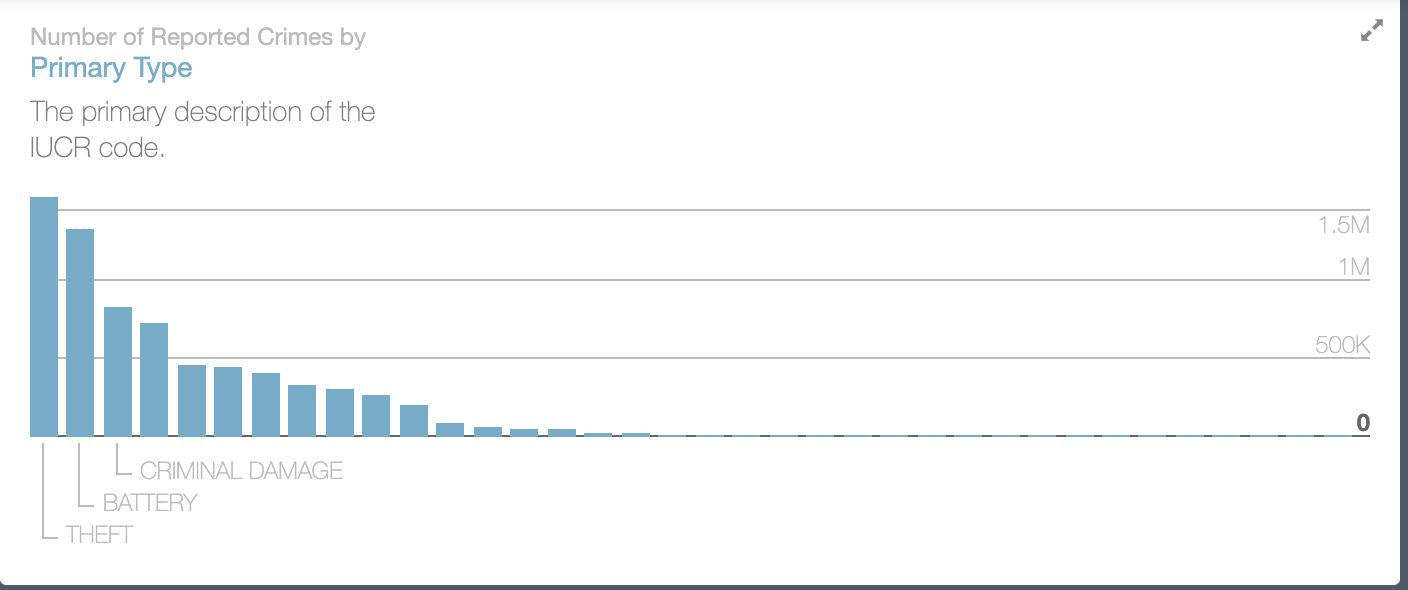

`Link`: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

## Percent of Crimes Cleared by Arrest, 2015

### FBI. (2016, June 17). National Data. FBI. https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/offenses-known-to-law-enforcement/clearances/national-data. 

The next visualization comes from the FBI, in which it describes the percent of crimes that were cleared by arrest or exceptional means in 2015. The data for the visualization is on a nationwide scale. From this, it can be seen that **murder** and **nonnegligent manslaughter** were the most common crimes that were cleared by arrest in 2015. In other words, this was the most common crime that police had to intervene with force/arrest. Although the visualization does not describe which crimes occured the most in general, it gives the audience an idea that the most **violent crimes were due to murder on a national scale in the year of 2015.** Perhaps this is a visulization that can be done in the future for the city of Chicago, in which it could give the public an idea of what crimes the police had intervene in with arrest or exceptional means. It can provide a different story for Chicago, and give futher insgihts to violent crimes in the city.

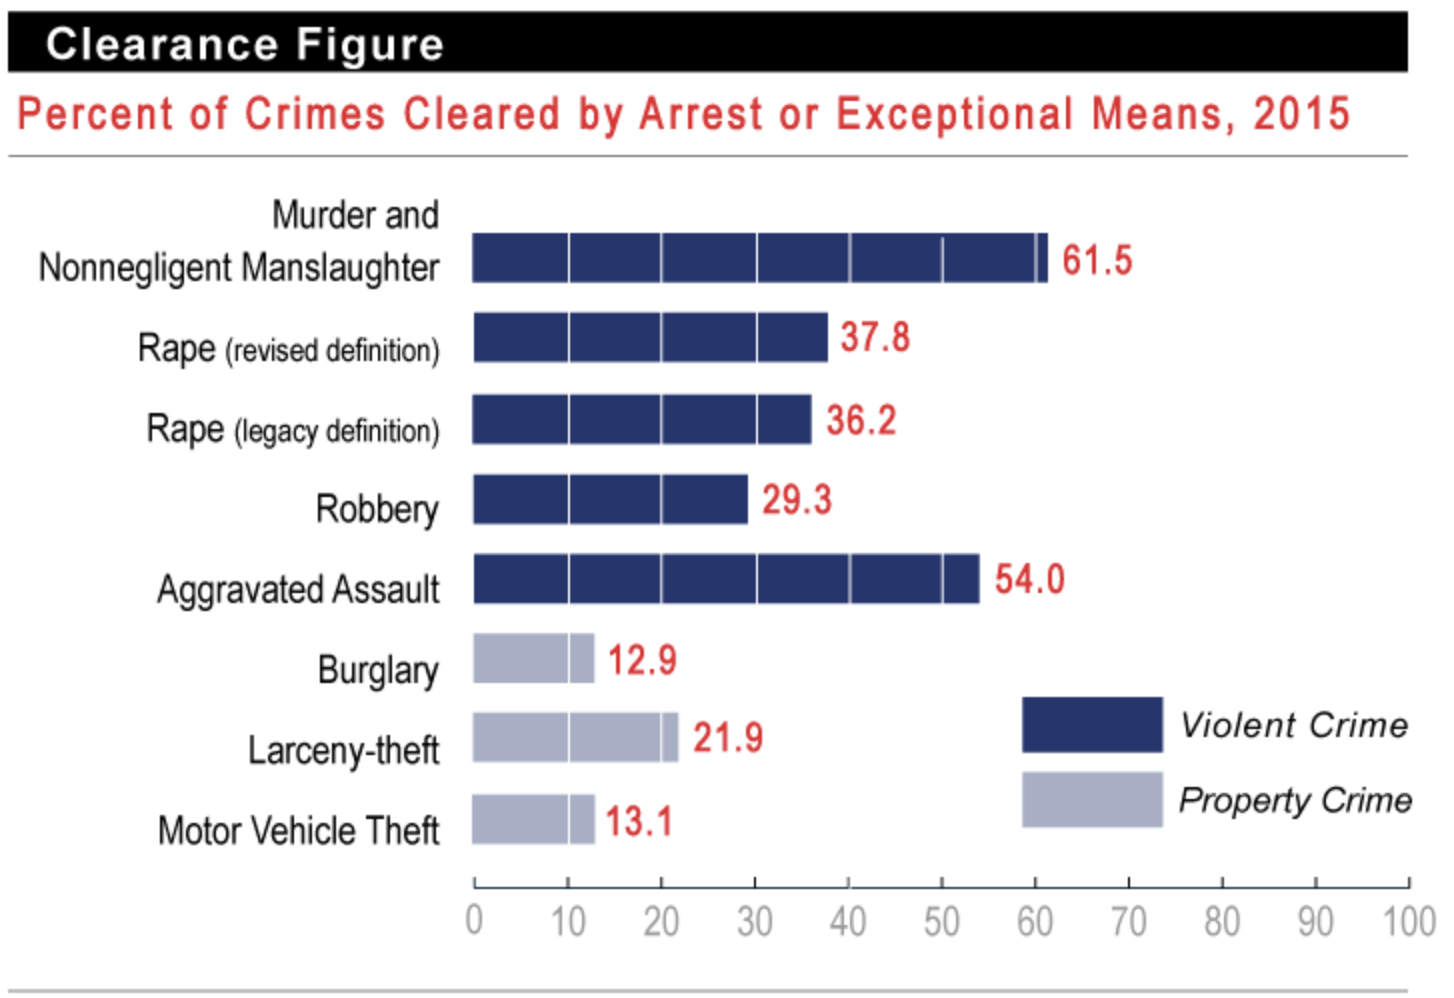

`Link`: https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/offenses-known-to-law-enforcement/clearances/national-data

### References 

Department, C. P. (2021, May 10). Crimes - 2001 to Present: City of Chicago: Data Portal. Chicago Data Portal. https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2. 

FBI. (2016, June 17). National Data. FBI. https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/offenses-known-to-law-enforcement/clearances/national-data. 